# Unsupervised Learning

In this task, we are unsupervised learning algorithm on Iris data.

We are using Clustering for classification of Iris flower.

## Import modules

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import dataset

In [23]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

In [24]:
# shape
print(data.shape)

(150, 5)


In [25]:
# head
print(data.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [26]:
# descriptions
print(data.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [27]:
# class distribution
print(data.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [28]:
#Check for null values
data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

From above, we can say that there is no null values.

## Visualising the data

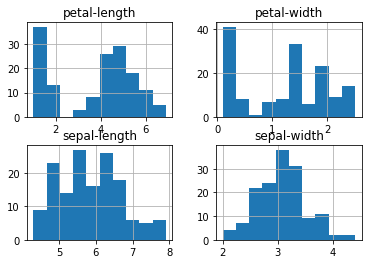

In [29]:
# histograms
data.hist()
plt.show()

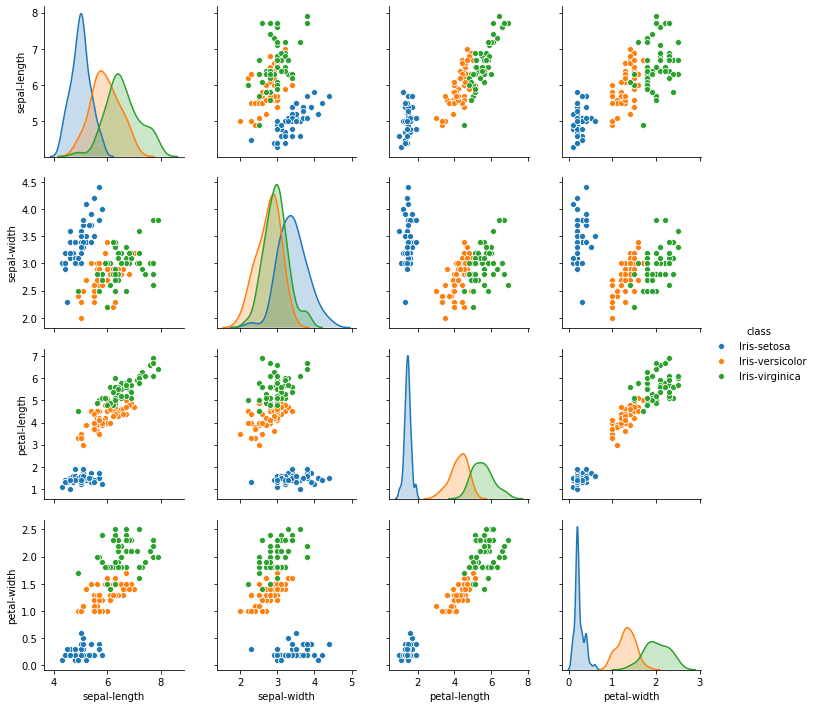

In [30]:
sns.pairplot(data, hue="class")
plt.show()

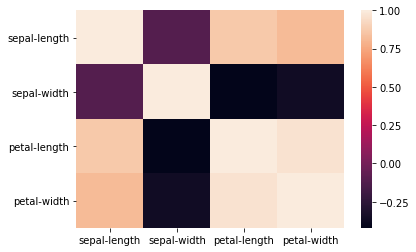

In [31]:
#Correlation of data
corr = data.corr()
sns.heatmap(corr)
plt.show()

In [32]:
X = data.iloc[:, :-1].values
y = data['class'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values

## Finding number of custers using Elbow Method

In [33]:
from sklearn.cluster import KMeans

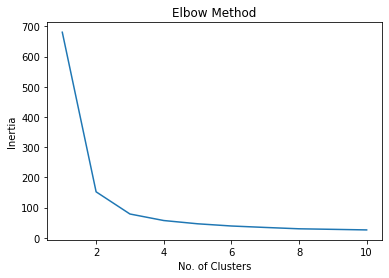

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init="k-means++")
    kmeans.fit(X, y)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.show()

From the above graph, The number of Clusers is "3"

## Fitting the Model

In [35]:
kmeans = KMeans(n_clusters = 3, init = "k-means++")
kmeans.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
y_pred = kmeans.predict(X)

In [37]:
clusters = kmeans.cluster_centers_

## Visualising the Clusters

Here, we are using sepal-length and sepal-width to plot clusters

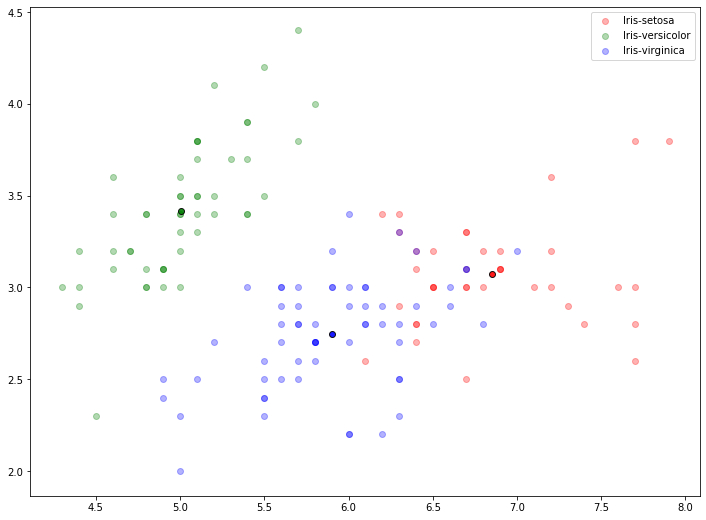

In [38]:
colors = ['red', 'green', 'blue']

plt.figure(figsize=(12,9))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c=colors[0], label="Iris-setosa", alpha=0.3)
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c=colors[1], label="Iris-versicolor", alpha=0.3)
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], c=colors[2], label = "Iris-virginica", alpha=0.3)

for i in range(len(clusters)):
    plt.scatter(clusters[i][0], clusters[i][1], c=colors[i], edgecolors="black", alpha=0.9)
    pass
    
plt.legend()
plt.show()